In [1]:
import json
import yaml
import matplotlib.pyplot as plt
import os
import numpy as np

def plotFormFactor(expFormFactor,k,legend,PlotColor):
    xValues = []
    yValues = []
    for i in expFormFactor:
        xValues.append(i[0])
        yValues.append(k*i[1])
    plt.plot(xValues,yValues,label = legend,color=PlotColor,linewidth=4.0)
    plt.xlabel(r'$q_{z} [Å^{-1}]$',size=20)
    plt.ylabel(r'$|F(q_{z})|$',size=20)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.yticks(color = 'w')
    plt.xlim([0,0.69])
    plt.ylim([-10,230])
    plt.legend(loc="upper right")
    plt.savefig('FormFactor.pdf')


def plotOrderParameters(OPsim, OPexp):
    xValuesHG = []
    xValuesSN1 = []
    xValuesSN2 = []
    
    yValuesHGsim = []
    yValuesSN1sim = []
    yValuesSN2sim = []
    yValuesHGsimERR = []
    yValuesSN1simERR = []
    yValuesSN2simERR = []
    yValuesHGexp = []
    yValuesSN1exp = []
    yValuesSN2exp = []

    sn1carbons = {'M_G1C3_M M_G1C3H1_M' :2,
                  'M_G1C3_M M_G1C3H2_M' :2,
                  'M_G1C4_M M_G1C4H1_M' :3,
                  'M_G1C4_M M_G1C4H2_M' :3,
                  'M_G1C5_M M_G1C5H1_M' :4,
                  'M_G1C5_M M_G1C5H2_M' :4,
                  'M_G1C6_M M_G1C6H1_M' :5,
                  'M_G1C6_M M_G1C6H2_M' :5,
                  'M_G1C7_M M_G1C7H1_M' :6,
                  'M_G1C7_M M_G1C7H2_M' :6,
                  'M_G1C8_M M_G1C8H1_M' :7,
                  'M_G1C8_M M_G1C8H2_M' :7,
                  'M_G1C9_M M_G1C9H1_M' :8,
                  'M_G1C9_M M_G1C9H2_M' :8,
                  'M_G1C10_M M_G1C10H1_M' :9,
                  'M_G1C10_M M_G1C10H2_M' :9,
                  'M_G1C11_M M_G1C11H1_M' :10,
                  'M_G1C11_M M_G1C11H2_M' :10,
                  'M_G1C12_M M_G1C12H1_M' :11,
                  'M_G1C12_M M_G1C12H2_M' :11,
                  'M_G1C13_M M_G1C13H1_M' :12,
                  'M_G1C13_M M_G1C13H2_M' :12,
                  'M_G1C14_M M_G1C14H1_M' :13,
                  'M_G1C14_M M_G1C14H2_M' :13,
                  'M_G1C15_M M_G1C15H1_M' :14,
                  'M_G1C15_M M_G1C15H2_M' :14,
                  'M_G1C16_M M_G1C16H1_M' :15,
                  'M_G1C16_M M_G1C16H2_M' :15,
                  'M_G1C17_M M_G1C17H1_M' :16,
                  'M_G1C17_M M_G1C17H2_M' :16,
                  'M_G1C17_M M_G1C17H3_M' :16,
                 }
    
    sn2carbons = {'M_G2C3_M M_G2C3H1_M' :2,
                  'M_G2C3_M M_G2C3H2_M' :2,
                  'M_G2C4_M M_G2C4H1_M' :3,
                  'M_G2C4_M M_G2C4H2_M' :3,
                  'M_G2C5_M M_G2C5H1_M' :4,
                  'M_G2C5_M M_G2C5H2_M' :4,
                  'M_G2C6_M M_G2C6H1_M' :5,
                  'M_G2C6_M M_G2C6H2_M' :5,
                  'M_G2C7_M M_G2C7H1_M' :6,
                  'M_G2C7_M M_G2C7H2_M' :6,
                  'M_G2C8_M M_G2C8H1_M' :7,
                  'M_G2C8_M M_G2C8H2_M' :7,
                  'M_G2C9_M M_G2C9H1_M' :8,
                  'M_G2C9_M M_G2C9H2_M' :8,
                  'M_G2C10_M M_G2C10H1_M' :9,
                  'M_G2C10_M M_G2C10H2_M' :9,
                  'M_G2C11_M M_G2C11H1_M' :10,
                  'M_G2C11_M M_G2C11H2_M' :10,
                  'M_G2C12_M M_G2C12H1_M' :11,
                  'M_G2C12_M M_G2C12H2_M' :11,
                  'M_G2C13_M M_G2C13H1_M' :12,
                  'M_G2C13_M M_G2C13H2_M' :12,
                  'M_G2C14_M M_G2C14H1_M' :13,
                  'M_G2C14_M M_G2C14H2_M' :13,
                  'M_G2C15_M M_G2C15H1_M' :14,
                  'M_G2C15_M M_G2C15H2_M' :14,
                  'M_G2C16_M M_G2C16H1_M' :15,
                  'M_G2C16_M M_G2C16H2_M' :15,
                  'M_G2C17_M M_G2C17H1_M' :16,
                  'M_G2C17_M M_G2C17H2_M' :16,
                  'M_G2C17_M M_G2C17H3_M' :16,
                  'M_G2C18_M M_G2C18H1_M' :17,
                  'M_G2C18_M M_G2C18H2_M' :17,
                  'M_G2C18_M M_G2C18H3_M' :17,
                  'M_G2C19_M M_G2C19H1_M' :18,
                  'M_G2C19_M M_G2C19H2_M' :18,
                  'M_G2C19_M M_G2C19H3_M' :18,
                 }
    
    HGcarbons = {'M_G3N6C1_M M_G3N6C1H1_M' : 1,
                 'M_G3N6C1_M M_G3N6C1H2_M' : 1,
                 'M_G3N6C1_M M_G3N6C1H3_M' : 1,
                 'M_G3N6C2_M M_G3N6C2H1_M' : 1,
                 'M_G3N6C2_M M_G3N6C2H2_M' : 1,
                 'M_G3N6C2_M M_G3N6C2H3_M' : 1,
                 'M_G3N6C3_M M_G3N6C3H1_M' : 1,
                 'M_G3N6C3_M M_G3N6C3H2_M' : 1,
                 'M_G3N6C3_M M_G3N6C3H3_M' : 1,
                 'M_G3C5_M M_G3C5H1_M' : 2,
                 'M_G3C5_M M_G3C5H2_M' : 2,
                 'M_G3C4_M M_G3C4H1_M' : 3,
                 'M_G3C4_M M_G3C4H2_M' : 3,
                 'M_G3_M M_G3H1_M' : 4,
                 'M_G3_M M_G3H2_M' : 4,
                 'M_G2_M M_G2H1_M' : 5,
                 'M_G1_M M_G1H1_M' : 6,
                 'M_G1_M M_G1H2_M' : 6,
                 }
    
    
    for key in OPsim:
        if 'M_G1C' in key:
            xValuesSN1.append(sn1carbons[key])
            yValuesSN1sim.append(float(OPsim[key][0][0]))
            yValuesSN1simERR.append(float(OPsim[key][0][2]))
            yValuesSN1exp.append(OPexp[key][0][0])
        elif 'M_G2C' in key:
            xValuesSN2.append(sn2carbons[key])
            yValuesSN2sim.append(float(OPsim[key][0][0]))
            yValuesSN2simERR.append(float(OPsim[key][0][2]))
            yValuesSN2exp.append(OPexp[key][0][0])
        elif 'M_G3' in key or 'M_G2_M' in key or 'M_G1_M' in key:
            xValuesHG.append(HGcarbons[key])
            yValuesHGsim.append(float(OPsim[key][0][0]))
            yValuesHGsimERR.append(float(OPsim[key][0][2]))
            yValuesHGexp.append(OPexp[key][0][0])
    #print(xValues,yValues)
    plt.rc('font', size=15)
    #plt.plot(xValuesHG,yValuesHGsim,'.',color='red',markersize=15)
    plt.errorbar(xValuesHG,yValuesHGexp, yerr = 0.02,fmt='.',color='black',markersize=25)
    plt.errorbar(xValuesHG,yValuesHGsim, yerr = yValuesHGsimERR,fmt='.',color='red',markersize=20)
    #plt.plot(xValuesHG,yValuesHGexp,'.',color='black',markersize=15)
    my_xticks = ['\u03B3','\u03B2','\u03B1','$g_{1}$','$g_{2}$','$g_{3}$']
    plt.xticks([1,2,3,4,5,6], my_xticks,size=20)
    #plt.xlabel('Carbon')
    plt.ylim([-0.25,0.09])
    plt.yticks(size=20)
    #plt.yticks(color = 'w')
    plt.ylabel(r'$S_{CH}$',size=25)
    plt.savefig('HG.pdf')
    plt.show()
    
    plt.text(2, -0.04, 'sn-1', fontsize=25)
    plt.xticks(np.arange(min(xValuesSN1), max(xValuesSN1)+1, 2.0))
    plt.plot(xValuesSN1,yValuesSN1sim,color='red')
    plt.plot(xValuesSN1,yValuesSN1exp,color='black')
    plt.errorbar(xValuesSN1,yValuesSN1sim, yerr = yValuesSN1simERR,fmt='.',color='red',markersize=25)
    plt.errorbar(xValuesSN1,yValuesSN1exp, yerr = 0.02, fmt='.',color='black',markersize=20)
    #plt.xlabel('Carbon')
    plt.ylabel(r'$S_{CH}$',size=25)
    plt.xticks(size=20)
    plt.yticks(size=20)
    #plt.yticks(color = 'w')
    plt.ylim([-0.3,0.01])
    plt.savefig('sn-1.pdf')
    plt.show()
    
    plt.text(2, -0.04, 'sn-2', fontsize=25)
    plt.xticks(np.arange(min(xValuesSN2), max(xValuesSN2)+1, 2.0))
    plt.plot(xValuesSN2,yValuesSN2sim,color='red')
    plt.plot(xValuesSN2,yValuesSN2exp,color='black')
    plt.errorbar(xValuesSN2,yValuesSN2sim,yValuesSN2simERR,fmt='.',color='red',markersize=25)
    plt.errorbar(xValuesSN2,yValuesSN2exp, yerr = 0.02, fmt='.',color='black',markersize=20)
    plt.xlabel('Carbon',size=25)
    plt.ylabel(r'$S_{CH}$',size=25)
    plt.xticks(size=20)
    plt.yticks(size=20)
    #plt.yticks(color = 'w')
    plt.ylim([-0.25,0.01])
    plt.savefig('sn-2.pdf')
    plt.show()


def plotSimulation(path, lipid):
    DataBankPath = '../../Databank/Data/'
    path = DataBankPath + path
    #lipid = 'POPC'
    FFpathSIM = path + 'FormFactor.json'
    OPpathSIM = path + lipid + 'OrderParameters.json'
    READMEfilepath = path + '/README.yaml'
    FFQualityFilePath = path + '/FormFactorQuality.json'

    with open(READMEfilepath) as yaml_file:
        readme = yaml.load(yaml_file, Loader=yaml.FullLoader)
   
    with open(FFQualityFilePath) as json_file:
        FFq = json.load(json_file)
    
    for subdir, dirs, files in os.walk(DataBankPath + 'experiments/FormFactors/' + readme['EXPERIMENT']['FORMFACTOR'] + '/'):
            for filename in files:
                #filepath = '../../Data/experiments/FormFactors/' + expFFpath + '/' + filename
                if filename.endswith('_FormFactor.json'):
                        FFpathEXP = subdir + filename
    #FFpathEXP =  DataBankPath + 'experiments/FormFactors/' + readme['EXPERIMENT']['FORMFACTOR'] + '/POPS_ULV_25Cin0D_SHE_FormFactor.json'
    with open(FFpathEXP) as json_file:
        FFexp = json.load(json_file)
    
    with open(OPpathSIM) as json_file:
        OPsim = json.load(json_file)

    OPexp = {}
    for expOPfolder in list(readme['EXPERIMENT']['ORDERPARAMETER'][lipid].values()):
        #expOPfolder = list(readme['EXPERIMENT']['ORDERPARAMETER'][lipid].values())[0]
        OPpathEXP =  DataBankPath + 'experiments/OrderParameters/' + expOPfolder + '/' + lipid + '_Order_Parameters.json'
        #print(OPpathEXP)
        with open(OPpathEXP) as json_file:
            OPexp.update(json.load(json_file))
    #print(OPexp)

    try:
        with open(FFpathSIM) as json_file:
            FFsim = json.load(json_file)
        plotFormFactor(FFsim,1, 'Simulation','red')
        plotFormFactor(FFexp,FFq[1], 'Experiment','black')
        plt.show()
    except:
        print('Form factor plotting failed')
    
    plotOrderParameters(OPsim, OPexp)
    #print(OPsim)
    #print(OPexp)

# Overall best simulation Slipids POPC (10.5281/zenodo.6582985)

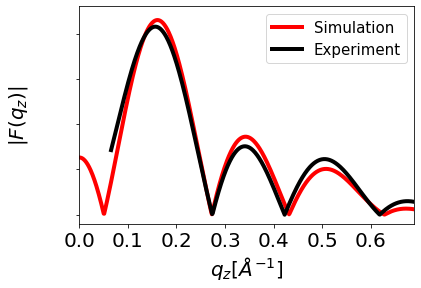

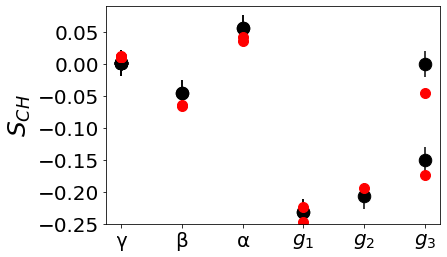

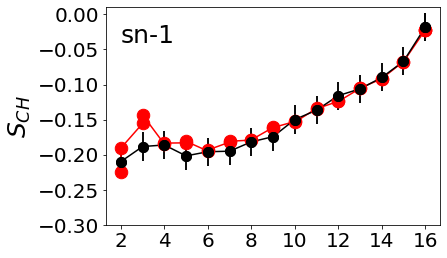

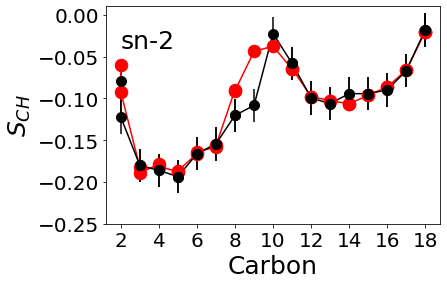

In [5]:
plotSimulation('Simulations/692/0a3/6920a30724aaee777ec0b58cbcf374950e2f8c5a/1f0e4272f1802217f3e07b5599a6011f2b7ddac7/', 'POPC')

# Overall second best simulation Slipids POPC (10.5281/zenodo.166034)

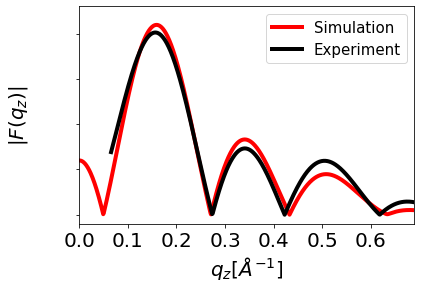

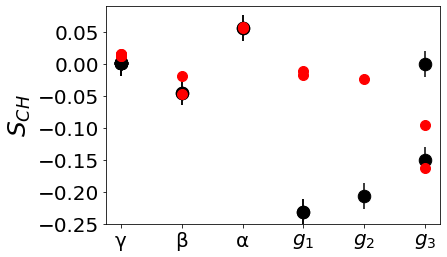

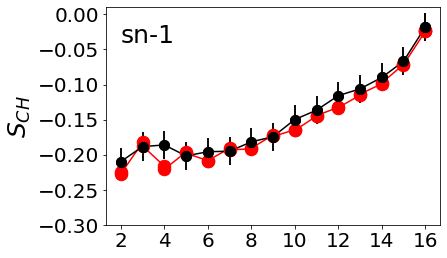

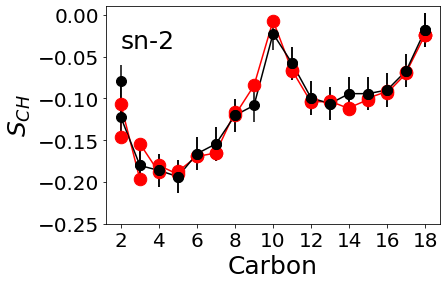

In [6]:
plotSimulation('Simulations/5a4/277/5a427728e5bcc18a6f162a8d325df4a9e4115250/f0fe9b9284aa683f9a419d9173d320cfa31d34cb/', 'POPC')

# Best quality for acyl chains POPC Berger (10.5281/zenodo.1402417)

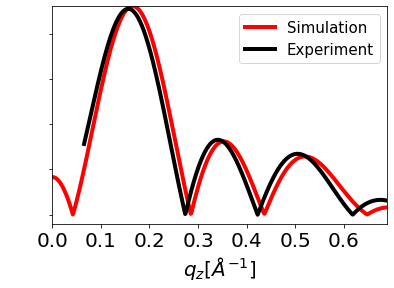

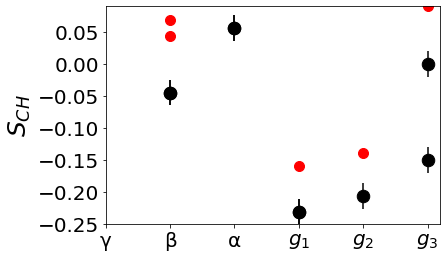

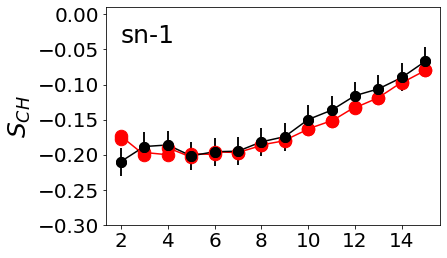

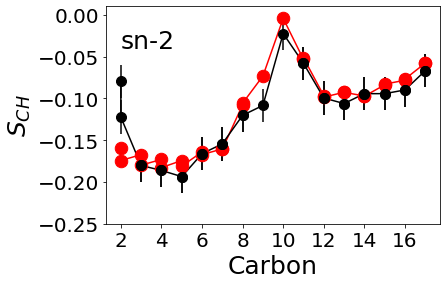

In [21]:
plotSimulation('Simulations/b26/a77/b26a77bb464996d420103059fbfc792f35f000d8/508b09dc91e254f859051b74040b1dc8e1342919/','POPC')

# Second best quality for sn-2 chain in Berger POPC (10.5281/zenodo.4643875)

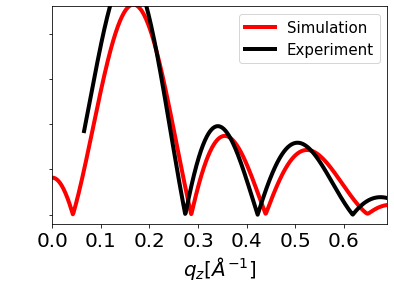

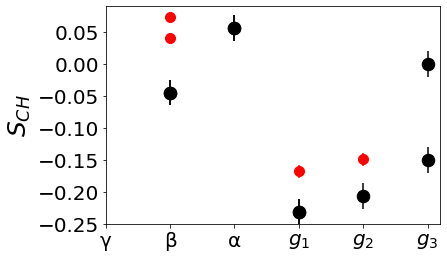

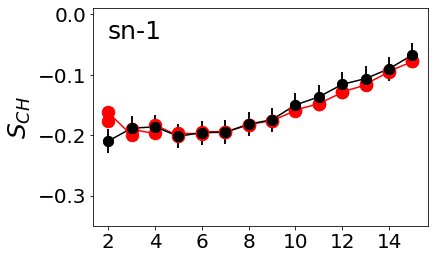

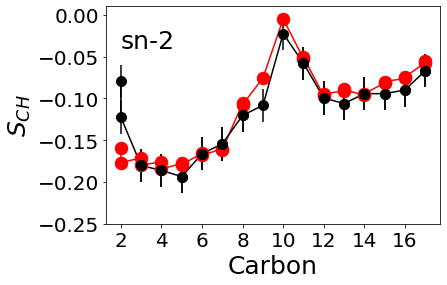

In [16]:
plotSimulation('Simulations/b06/79c/b0679cd5bb4bed509b91a002305d2771ed4ad54e/72ec31258e95aefa0d053131b9e734b4b11eb030/','POPC')

# Best quality for headgroup from CHARMM36 POPC (10.5281/zenodo.5767451)

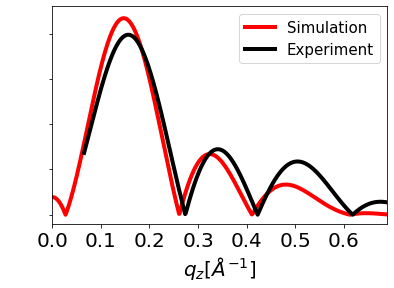

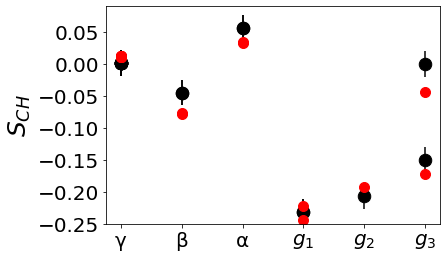

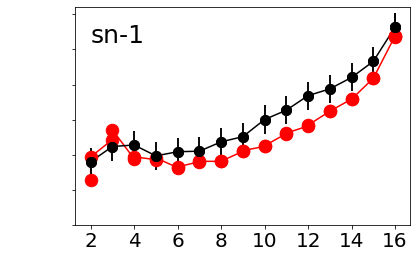

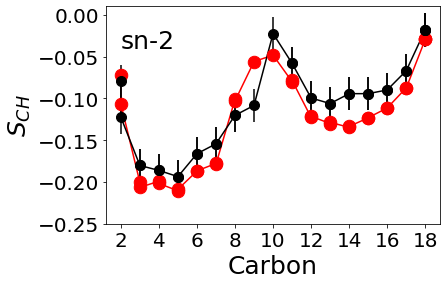

In [26]:
plotSimulation('Simulations/289/db0/289db0867ffc0e8e7a58ffc7c617f69eb7c60e82/1e1325dc1168c632b9978eaab70e8df6e34afbf3/','POPC')

# Best quality for form factor in Slipids POPE (10.5281/zenodo.3231342)

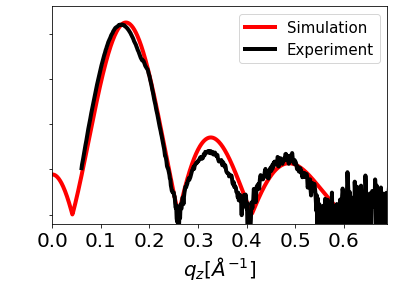

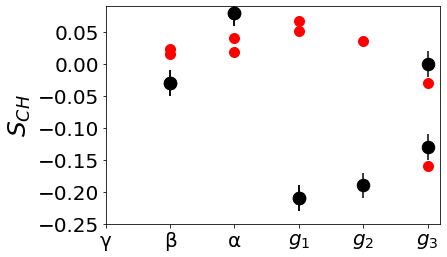

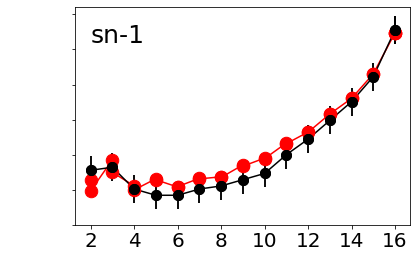

/home/osollila/.conda/envs/py39/lib/python3.9/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/home/osollila/.conda/envs/py39/lib/python3.9/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


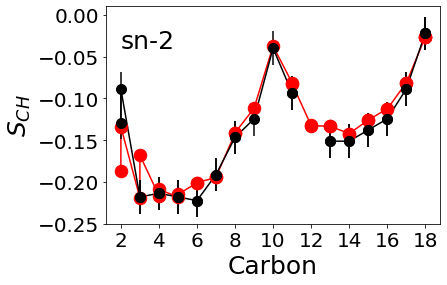

In [27]:
plotSimulation('Simulations/415/930/41593025f50adfceb2c888fed44afe0b1b7fe8da/34bafde4722aae82cc5972f9e30a54065d67159a/','POPE')

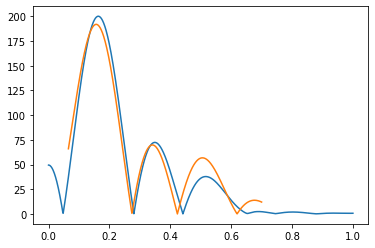

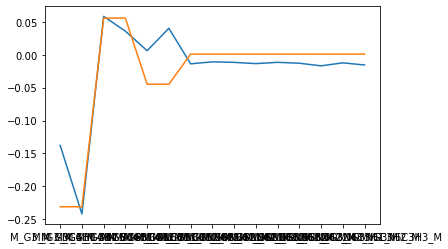

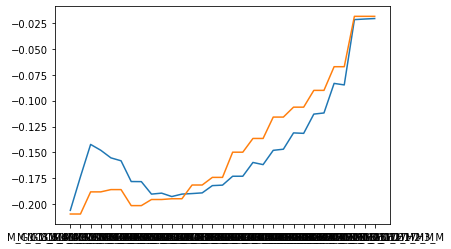

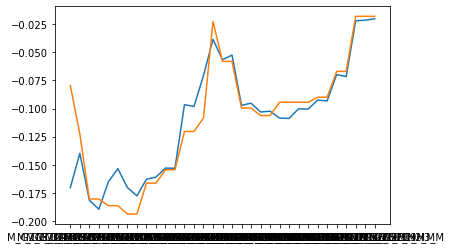

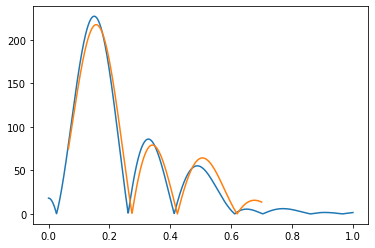

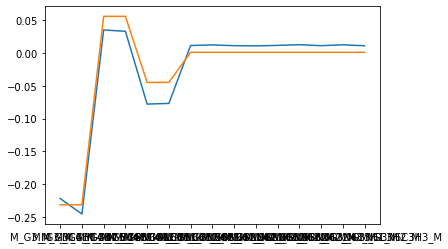

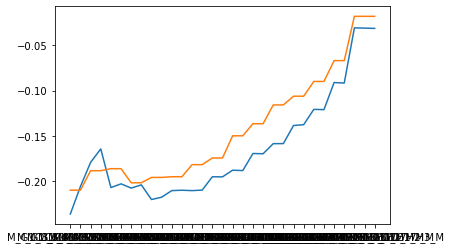

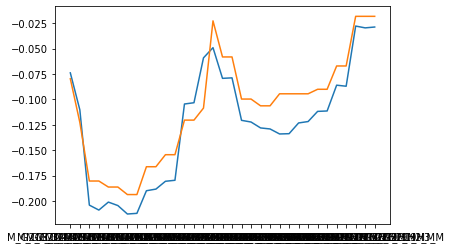

In [5]:
# 10.5281/zenodo.13498
plotSimulation('Simulations/6a7/ee8/6a7ee8ec651f41dbaa4460d095ad2e30b27de20b/9b33210b33f94f175df15b16f5064d9464900b05/', 'POPC')

plotSimulation('Simulations/a63/ca7/a63ca7001cbd5cfc328da122668d1aebc00f2c91/220540156a6ac7813942fd01d998a491b6ff9b8b/', 'POPC')

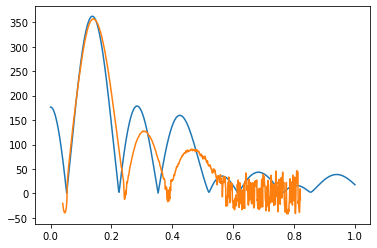

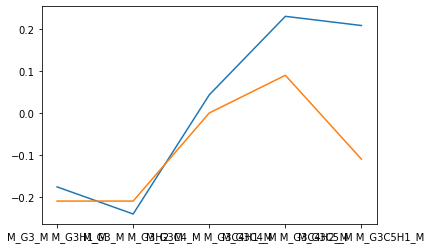

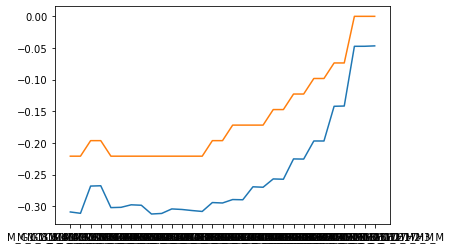

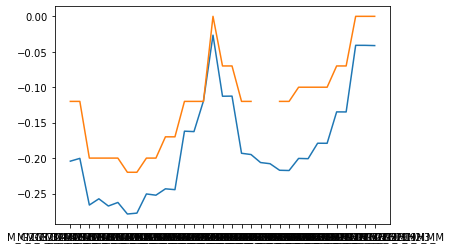

{'M_G1_M M_G1H1_M': [[-0.2926621045269774, 0.0949491829423364, 0.011268394877645752]], 'M_G1_M M_G1H2_M': [[0.05215626195708286, 0.14644560470798168, 0.017379895759054007]], 'M_G1C3_M M_G1C3H1_M': [[-0.3088198483232872, 0.0348850647400579, 0.004140095497840584]], 'M_G1C3_M M_G1C3H2_M': [[-0.310948140517852, 0.036533526707835405, 0.004335731940599432]], 'M_G1C4_M M_G1C4H1_M': [[-0.2679491778646066, 0.03042130586150721, 0.0036103447814741915]], 'M_G1C4_M M_G1C4H2_M': [[-0.2674557079783698, 0.032896883577121894, 0.003904141804106686]], 'M_G1C5_M M_G1C5H1_M': [[-0.3019528129171347, 0.027655206732093533, 0.0032820692103207776]], 'M_G1C5_M M_G1C5H2_M': [[-0.30150686606245797, 0.024579578995439028, 0.0029170593517913934]], 'M_G1C6_M M_G1C6H1_M': [[-0.29752000152765706, 0.024955955326659424, 0.0029617270044384595]], 'M_G1C6_M M_G1C6H2_M': [[-0.2982242105477418, 0.02301091268630251, 0.0027308929114404066]], 'M_G1C7_M M_G1C7H1_M': [[-0.31205559975656594, 0.02018806095088538, 0.002395882045101033

In [22]:
plotSimulation('Simulations/611/eb1/611eb1451b3406f9a07395e74c89a779da77dd0e/7dacf9299757643c2ab76db9536d80031346829f/', 'POPS')

Form factor plotting failed


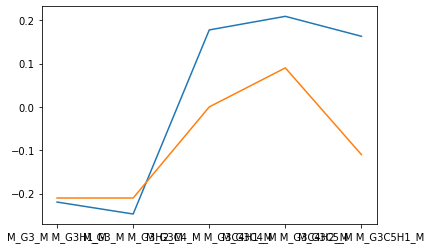

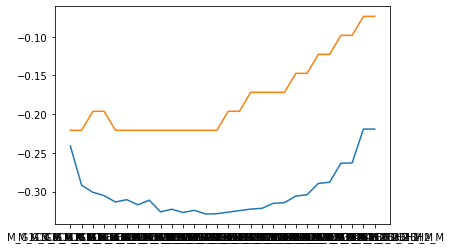

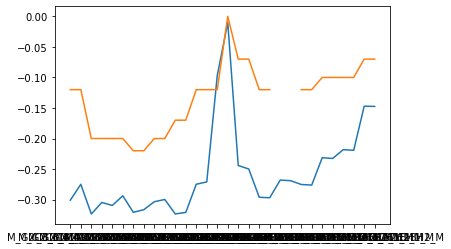

{'M_G1_M M_G1H1_M': [['0.22922', '0.34521', '0.03051']], 'M_G1_M M_G1H2_M': [['0.15818', '0.33624', '0.02972']], 'M_G1C3_M M_G1C3H1_M': [['-0.24092', '0.15234', '0.01346']], 'M_G1C3_M M_G1C3H2_M': [['-0.29165', '0.09962', '0.00881']], 'M_G1C4_M M_G1C4H1_M': [['-0.30085', '0.09283', '0.00821']], 'M_G1C4_M M_G1C4H2_M': [['-0.30511', '0.07976', '0.00705']], 'M_G1C5_M M_G1C5H1_M': [['-0.31338', '0.06297', '0.00557']], 'M_G1C5_M M_G1C5H2_M': [['-0.31037', '0.06447', '0.00570']], 'M_G1C6_M M_G1C6H1_M': [['-0.31700', '0.05523', '0.00488']], 'M_G1C6_M M_G1C6H2_M': [['-0.31104', '0.05627', '0.00497']], 'M_G1C7_M M_G1C7H1_M': [['-0.32606', '0.04595', '0.00406']], 'M_G1C7_M M_G1C7H2_M': [['-0.32273', '0.04543', '0.00402']], 'M_G1C8_M M_G1C8H1_M': [['-0.32694', '0.04293', '0.00379']], 'M_G1C8_M M_G1C8H2_M': [['-0.32409', '0.04408', '0.00390']], 'M_G1C9_M M_G1C9H1_M': [['-0.32889', '0.04000', '0.00354']], 'M_G1C9_M M_G1C9H2_M': [['-0.32852', '0.03744', '0.00331']], 'M_G1C10_M M_G1C10H1_M': [['-0.32

In [30]:
plt.text(2, -0.04, 'sn-1', fontsize=20)plotSimulation('Simulations/7e2/66a/7e266a6989c04c46a79a2f444b521c595053c4e1/7de7367161b8ffa3b3388f6b5f61825aacf8a360/','POPS')

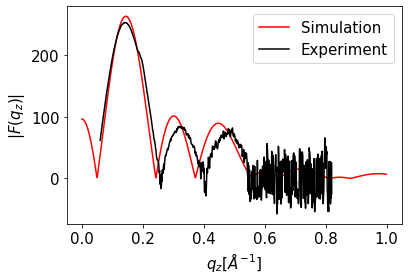

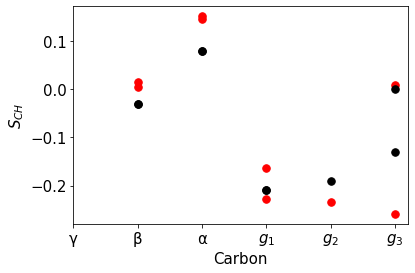

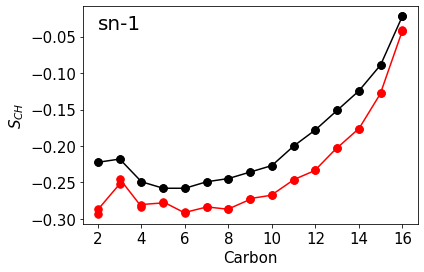

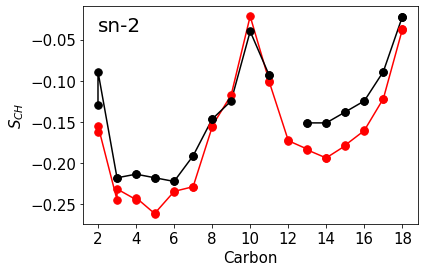

In [3]:
plotSimulation('Simulations/b58/0d1/b580d13983ed1b38cf975bc3f129c58bf05efd5a/244f4bc5e15f39de659fa2b13e30cd833084af44/','POPE')

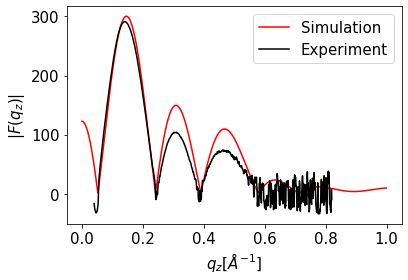

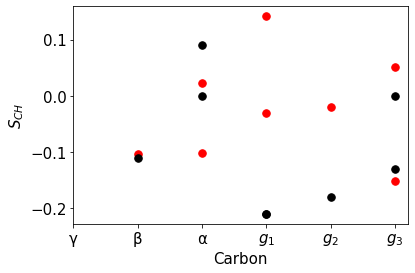

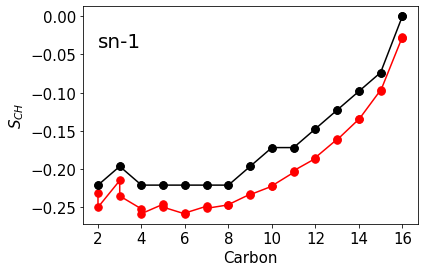

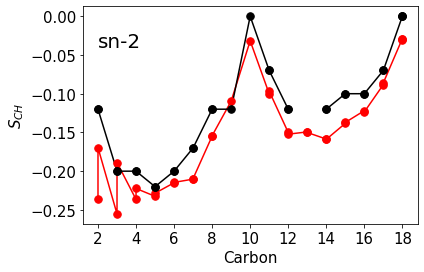

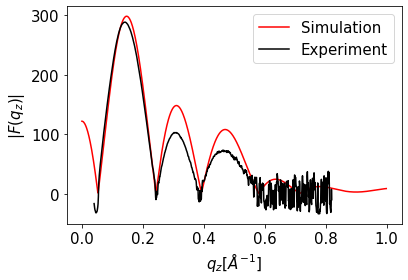

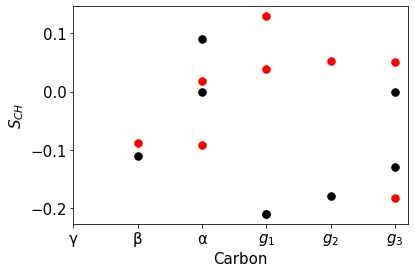

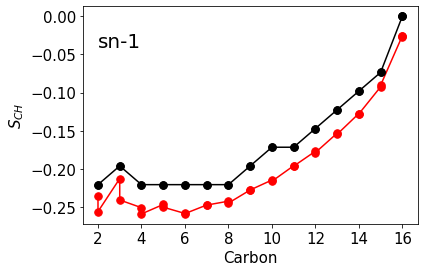

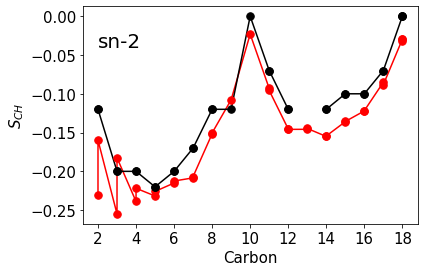

In [4]:
plotSimulation('Simulations/02b/984/02b98418d9965749ac943ecae9627cfdd1dfbdcd/7339faa76da6c93cfee03e59f399e2eed1628b53/','POPS')
plotSimulation('Simulations/ce5/80e/ce580ea7b4e991122666ed4fc3c779e3783cbc95/e2c64d1a46b3571951cce2c90ab7302a8f300a9b/','POPS')

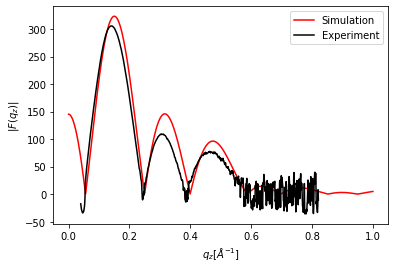

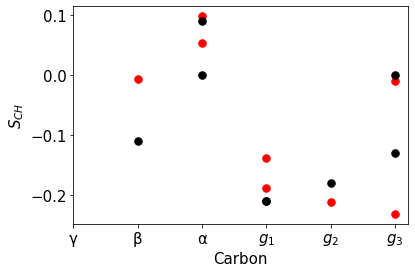

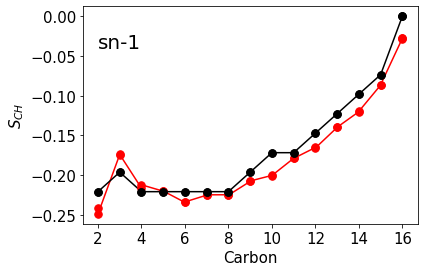

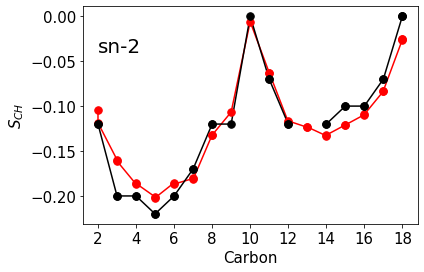

In [3]:
plotSimulation('Simulations/a33/b16/a33b16c62911e46c6cfeffc5c1cbf9eeb548da67/c8e02bee0bb725a95396e3d471060434dba329e6/','POPS')

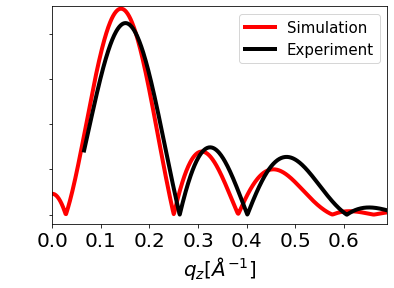

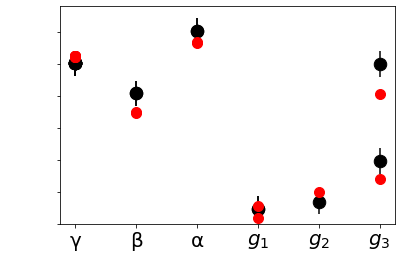

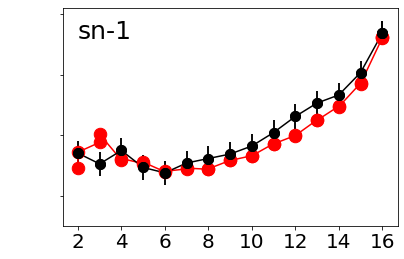

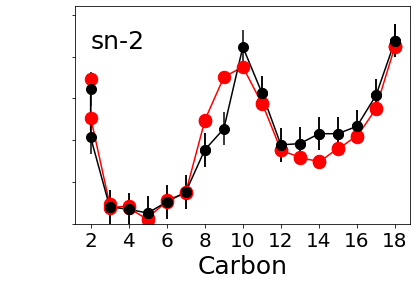

In [5]:
plotSimulation('Simulations/c17/59d/c1759dd2351b303be2f9acde5b8e9dcd7eaf22b1/9e4948f45157c1c4efd364b200f56b244d29e012/','POPC')

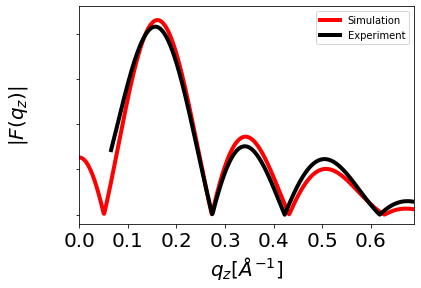

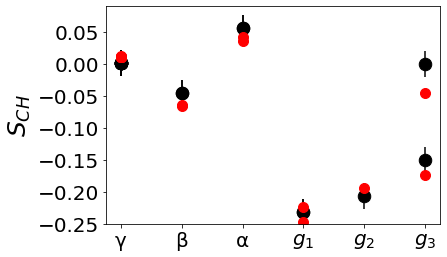

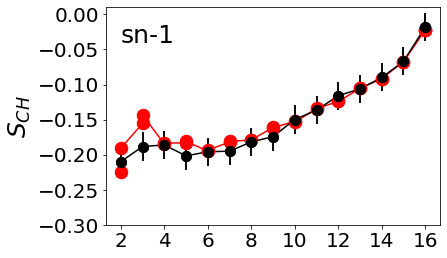

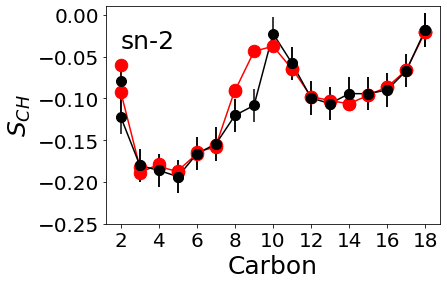

In [5]:
plotSimulation('Simulations/692/0a3/6920a30724aaee777ec0b58cbcf374950e2f8c5a/1f0e4272f1802217f3e07b5599a6011f2b7ddac7/','POPC')

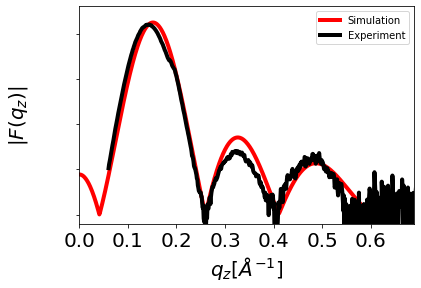

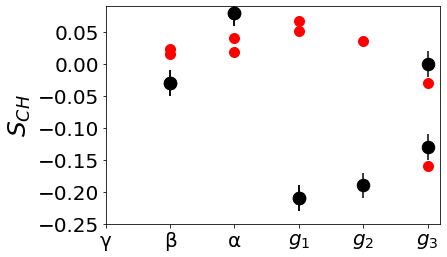

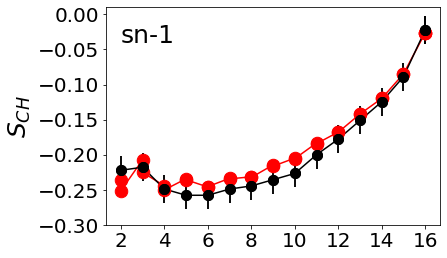

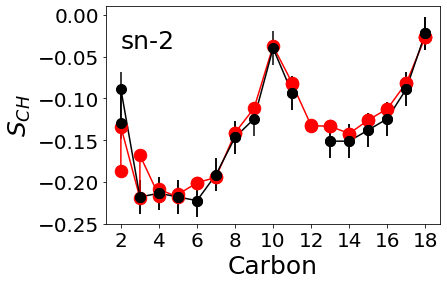

In [3]:
plotSimulation('Simulations/415/930/41593025f50adfceb2c888fed44afe0b1b7fe8da/34bafde4722aae82cc5972f9e30a54065d67159a/','POPE')